<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**Additional datasets**<br>
In addition to the 2 datasets that are given, I will be using these additional datasets for my analysis:

from data.gov.sg,

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
This dataset contains the monthly mean relative humidity between the years 1982 to 2023.

* [Surface Air Temperature](https://beta.data.gov.sg/datasets/1371/view)
This dataset contains the monthly maxmimum air temperature between the years 1982 to 2023.

from singstat.gov.sg,

* [International Visitor Arrivals by Country of Nationality](https://beta.data.gov.sg/datasets/1605/view)
This dataset contains the number of arrivals from different regions and countries to Singapore per month from 1984 to 2023.


## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

Asia was the most affected region by the changing climate, according to a report by the World Meteorological Organization (WMO). Knowing this, tourists might be averse in traveling to asian cities. With this, it can affect Singapore in its tourism industry. This analysis aims to find out if the changes in climate in Singapore influence the number of tourists visiting the country.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

Climate change impacts the general natural occurences around the world like flood and drought. it can also bring about social issues such as increasing dengue fever and in many countries, it could also affect the air and water quality. The agriculture, tourism and the energy industries are also affected by the changes in the climate. In Singapore, based on the Singapore Tourism Board, tourism makes up 4% of the Singapore's Gross Domestic Product (GDP). According to The Straits Times, the rising temperature could result in a decrease in tourism in the Greek islands but on the contrary, it would increase the tourism in western Wales. We want to investigate: to what extent do the changes in the Singaporean climate is affecting the number of tourists visiting Sigapore and how can we work around the changes to increase the number of tourists into Singapore.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def find_mean(list):
    
    total = 0
    
    for i in list:
        total += i
        
    average = total/len(list)
    
    return average

print(find_mean([1,2,3,4,5]))
print(find_mean([43,209,34,3]))

3.0
72.25


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def standard_dev(list):
    
    total = 0
    
    for i in list:
        diff_sq = (i - find_mean(list))**2
        total += diff_sq
        
    outcome = (total/len(list))**0.5
    
    return outcome

print(standard_dev([1,2,3,4,5]))
print(standard_dev([43,209,34,3]))

1.4142135623730951
80.33484611300379


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### i. Data import

In [5]:
# importing climate datasets

rainfall_total_df = pd.read_csv('data/rainfall-monthly-total.csv')
rainfall_days_df = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
relative_humidity_df = pd.read_csv('data/RelativeHumidityMonthlyMean.csv')
surface_air_temp_df = pd.read_csv('data/SurfaceAirTemperatureMonthlyAbsoluteExtremeMaximum.csv')

In [6]:
rainfall_total_df.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [7]:
rainfall_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [8]:
rainfall_total_df.isnull().sum()

month             0
total_rainfall    0
dtype: int64

In [9]:
rainfall_days_df.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [10]:
rainfall_days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [11]:
rainfall_days_df.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

In [12]:
rainfall_df = pd.merge(left = rainfall_days_df,
         right = rainfall_total_df,
         on = 'month')

In [13]:
rainfall_df.head()

,month,no_of_rainy_days,total_rainfall
0,1982-01,10,107.1
1,1982-02,5,27.8
2,1982-03,11,160.8
3,1982-04,14,157.0
4,1982-05,10,102.2


In [14]:
relative_humidity_df.head()

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [15]:
relative_humidity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    497 non-null    object 
 1   mean_rh  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [16]:
relative_humidity_df.isnull().sum()

month      0
mean_rh    0
dtype: int64

In [17]:
surface_air_temp_df.head()

,month,max_temperature
0,1982-01,31.9
1,1982-02,34.3
2,1982-03,34.3
3,1982-04,33.2
4,1982-05,32.9


In [18]:
surface_air_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            497 non-null    object 
 1   max_temperature  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [19]:
surface_air_temp_df.isnull().sum()

month              0
max_temperature    0
dtype: int64

In [20]:
humidity_air_temp_df = pd.merge(left=relative_humidity_df,
                           right=surface_air_temp_df,
                           on = 'month')

In [21]:
humidity_air_temp_df.head()

,month,mean_rh,max_temperature
0,1982-01,81.2,31.9
1,1982-02,79.5,34.3
2,1982-03,82.3,34.3
3,1982-04,85.9,33.2
4,1982-05,83.2,32.9


In [22]:
humidity_air_temp_df.rename(columns={'mean_rh':'mean_rel_humid'},inplace=True)

In [23]:
climate_df = pd.merge(left=rainfall_df,
                  right=humidity_air_temp_df,
                  on = 'month')

In [24]:
climate_df.head()

,month,no_of_rainy_days,total_rainfall,mean_rel_humid,max_temperature
0,1982-01,10,107.1,81.2,31.9
1,1982-02,5,27.8,79.5,34.3
2,1982-03,11,160.8,82.3,34.3
3,1982-04,14,157.0,85.9,33.2
4,1982-05,10,102.2,83.2,32.9


In [26]:
# changing the 'month' column from object to datetime format
climate_df['month'] = pd.to_datetime(climate_df['month'])

In [27]:
# checking the datatype
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   month             488 non-null    datetime64[ns]
 1   no_of_rainy_days  488 non-null    int64         
 2   total_rainfall    488 non-null    float64       
 3   mean_rel_humid    488 non-null    float64       
 4   max_temperature   488 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 22.9 KB


In [28]:
tourist_arrival_df = pd.read_csv('data/intl_visitor_arrival_continent.csv')

In [29]:
tourist_arrival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Month                                                            466 non-null    object
 1   Total International Visitor Arrivals By Inbound Tourism Markets  466 non-null    int64 
 2   Inbound from Southeast Asia                                      466 non-null    int64 
 3   Inbound from Greater China                                       466 non-null    object
 4   Inbound from North Asia                                          466 non-null    object
 5   Inbound from South Asia                                          466 non-null    int64 
 6   Inbound from West Asia                                           466 non-null    int64 
 7   Inbound from Americas                                

In [30]:
tourist_arrival_df.head()

,Month,Total International Visitor Arrivals By Inbound Tourism Markets,Inbound from Southeast Asia,Inbound from Greater China,Inbound from North Asia,Inbound from South Asia,Inbound from West Asia,Inbound from Americas,Inbound from Europe,Inbound from Oceania,Inbound from Africa,Inbound from Others
0,2023 May,1112486,456263,148053,68419,147694,9408,70425,113592,94072,4515,45
1,2023 Apr,1128594,489334,150903,54012,114662,11604,61021,135413,106741,4812,92
2,2023 Mar,1021032,414934,105132,71803,92462,12923,73624,161938,83827,4300,89
3,2023 Feb,957822,376492,82278,97981,76866,9159,72701,156384,81765,4073,123
4,2023 Jan,931670,362229,89323,78910,72222,8180,67899,131817,116788,4182,120


### ii. Data Cleaning

In [31]:
tourist_arrival_df['Month'] = pd.to_datetime(tourist_arrival_df['Month'])

In [32]:
# renaming the column names in tourist_arrival_df
tourist_arrival_df.rename(columns={'Month':'month',
                                    'Total International Visitor Arrivals By Inbound Tourism Markets':'total_intl_arr',
                                  'Inbound from Southeast Asia':'SEA',
                                  'Inbound from Greater China':'china',
                                  'Inbound from North Asia':'north_asia',
                                  'Inbound from South Asia':'south_asia',
                                  'Inbound from West Asia':'west_asia',
                                  'Inbound from Americas':'americas',
                                  'Inbound from Europe':'europe',
                                  'Inbound from Oceania':'oceania',
                                  'Inbound from Africa':'africa',
                                  'Inbound from Others':'others',},inplace=True)

In [33]:
tourist_arrival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           466 non-null    datetime64[ns]
 1   total_intl_arr  466 non-null    int64         
 2   SEA             466 non-null    int64         
 3   china           466 non-null    object        
 4   north_asia      466 non-null    object        
 5   south_asia      466 non-null    int64         
 6   west_asia       466 non-null    int64         
 7   americas        466 non-null    int64         
 8   europe          466 non-null    int64         
 9   oceania         466 non-null    int64         
 10  africa          466 non-null    int64         
 11  others          466 non-null    int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 43.8+ KB


#### Sorting the DataFrame by its date in ascending order

In [35]:
tourist_arrival_df.sort_values(by='month', ascending=True)

,month,total_intl_arr,SEA,china,north_asia,south_asia,west_asia,americas,europe,oceania,africa,others
465,1984-08-01,282186,90807,na,na,20370,5167,15988,41075,39594,1228,73
464,1984-09-01,239438,81071,na,na,21406,4507,16236,33367,35528,1281,51
463,1984-10-01,257737,87322,na,na,23938,4607,23260,40637,31496,1027,59
462,1984-11-01,248137,85587,na,na,20116,4648,19970,41181,28056,933,61
461,1984-12-01,272668,110948,na,na,22255,5728,16726,37858,28559,1442,151
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-01-01,931670,362229,89323,78910,72222,8180,67899,131817,116788,4182,120
3,2023-02-01,957822,376492,82278,97981,76866,9159,72701,156384,81765,4073,123
2,2023-03-01,1021032,414934,105132,71803,92462,12923,73624,161938,83827,4300,89
1,2023-04-01,1128594,489334,150903,54012,114662,11604,61021,135413,106741,4812,92


In [36]:
tourist_arrival_df.reset_index(drop=True)

,month,total_intl_arr,SEA,china,north_asia,south_asia,west_asia,americas,europe,oceania,africa,others
0,1984-08-01,282186,90807,na,na,20370,5167,15988,41075,39594,1228,73
1,1984-09-01,239438,81071,na,na,21406,4507,16236,33367,35528,1281,51
2,1984-10-01,257737,87322,na,na,23938,4607,23260,40637,31496,1027,59
3,1984-11-01,248137,85587,na,na,20116,4648,19970,41181,28056,933,61
4,1984-12-01,272668,110948,na,na,22255,5728,16726,37858,28559,1442,151
...,...,...,...,...,...,...,...,...,...,...,...,...
461,2023-01-01,931670,362229,89323,78910,72222,8180,67899,131817,116788,4182,120
462,2023-02-01,957822,376492,82278,97981,76866,9159,72701,156384,81765,4073,123
463,2023-03-01,1021032,414934,105132,71803,92462,12923,73624,161938,83827,4300,89
464,2023-04-01,1128594,489334,150903,54012,114662,11604,61021,135413,106741,4812,92


Converting the dtype of 'china' and 'north_asia' into integer.

In [37]:
# we see that the columns 'china' and 'north_asia' are objects. We will convert them into integer
tourist_arrival_df = tourist_arrival_df[tourist_arrival_df['china'] != r'na']

In [38]:
tourist_arrival_df = tourist_arrival_df[tourist_arrival_df['north_asia'] != r'na']

In [39]:
# changing the datatypes from object to integer

In [40]:
tourist_arrival_df['china'] = tourist_arrival_df['china'].astype('int')

In [41]:
tourist_arrival_df['north_asia'] = tourist_arrival_df['north_asia'].astype('int')

In [42]:
tourist_arrival_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 208 to 0
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           209 non-null    datetime64[ns]
 1   total_intl_arr  209 non-null    int64         
 2   SEA             209 non-null    int64         
 3   china           209 non-null    int64         
 4   north_asia      209 non-null    int64         
 5   south_asia      209 non-null    int64         
 6   west_asia       209 non-null    int64         
 7   americas        209 non-null    int64         
 8   europe          209 non-null    int64         
 9   oceania         209 non-null    int64         
 10  africa          209 non-null    int64         
 11  others          209 non-null    int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 21.2 KB


Merging the climate and tourist arrival dataframes together.

In [43]:
climate_tour_arr_df = pd.merge(left = climate_df,
                              right = tourist_arrival_df,
                              on = 'month')

In [44]:
climate_tour_arr_df.head()

,month,no_of_rainy_days,total_rainfall,mean_rel_humid,max_temperature,total_intl_arr,SEA,china,north_asia,south_asia,west_asia,americas,europe,oceania,africa,others
0,2006-01-01,20,454.4,87.8,32.0,767908,260033,126500,86071,55323,5530,43328,109806,73612,7267,438
1,2006-02-01,8,115.5,84.0,33.3,728158,236406,138037,85584,51966,4657,42178,114833,48706,5390,401
2,2006-03-01,9,83.1,81.3,34.6,819985,279370,130021,98576,63598,8169,46347,124983,61275,7193,453
3,2006-04-01,18,239.8,87.0,34.1,816654,298081,144917,73113,70380,5012,37580,103077,75336,8712,446
4,2006-05-01,14,205.7,85.2,33.8,766181,286718,118874,77211,94733,4610,38753,76368,62002,6427,485


In [45]:
climate_tour_arr_df.rename(columns={'month':'year_mm'},inplace=True)

In [46]:
# obtaining the year and month to insert into the dataframe for easier filtering later
year = climate_tour_arr_df['year_mm'].dt.year
month = climate_tour_arr_df['year_mm'].dt.month

In [47]:
climate_tour_arr_df.insert(0, 'year', year)

In [48]:
climate_tour_arr_df.insert(1, 'month', month)

In [49]:
climate_tour_arr_df.head()

,year,month,year_mm,no_of_rainy_days,total_rainfall,mean_rel_humid,max_temperature,total_intl_arr,SEA,china,north_asia,south_asia,west_asia,americas,europe,oceania,africa,others
0,2006,1,2006-01-01,20,454.4,87.8,32.0,767908,260033,126500,86071,55323,5530,43328,109806,73612,7267,438
1,2006,2,2006-02-01,8,115.5,84.0,33.3,728158,236406,138037,85584,51966,4657,42178,114833,48706,5390,401
2,2006,3,2006-03-01,9,83.1,81.3,34.6,819985,279370,130021,98576,63598,8169,46347,124983,61275,7193,453
3,2006,4,2006-04-01,18,239.8,87.0,34.1,816654,298081,144917,73113,70380,5012,37580,103077,75336,8712,446
4,2006,5,2006-05-01,14,205.7,85.2,33.8,766181,286718,118874,77211,94733,4610,38753,76368,62002,6427,485


#### We will be excluding the years that are affected by COVID19.

In [50]:
# remove covid years as tourist arrival was affected
climate_tour_arr_df = climate_tour_arr_df[climate_tour_arr_df['year']<2020]

In [51]:
climate_tour_arr_df.shape

(168, 18)

In [52]:
climate_tour_arr_df.describe()

,year,month,no_of_rainy_days,total_rainfall,mean_rel_humid,max_temperature,total_intl_arr,SEA,china,north_asia,south_asia,west_asia,americas,europe,oceania,africa,others
count,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2012.50000,6.500000,14.571429,174.258929,81.270238,33.425000,1.169586e+06,440354.029762,231719.232143,100218.547619,101583.244048,12141.565476,53034.303571,131287.880952,92466.684524,6522.732143,257.839286
std,4.04318,3.462373,5.229547,110.415105,3.934730,0.790645,2.798882e+05,107383.360288,102035.348699,23547.228686,29859.904556,4439.649599,13245.246765,32761.858882,19559.091705,1920.728933,799.137974
min,2006.00000,1.000000,1.000000,0.200000,72.000000,31.800000,6.899350e+05,231174.000000,76165.000000,49216.000000,51966.000000,4610.000000,30958.000000,70681.000000,46214.000000,3562.000000,0.000000
25%,2009.00000,3.750000,11.000000,100.450000,78.725000,32.800000,9.101000e+05,340344.500000,141584.000000,82968.000000,79296.000000,9307.000000,43212.000000,108929.500000,77031.000000,5233.000000,1.000000
50%,2012.50000,6.500000,15.000000,158.400000,81.500000,33.400000,1.195544e+06,455708.500000,212024.500000,98382.000000,94672.000000,11605.500000,49594.500000,124782.000000,91175.500000,6137.500000,3.500000
75%,2016.00000,9.250000,19.000000,237.400000,84.300000,33.925000,1.398572e+06,512317.750000,306321.500000,116155.750000,119533.000000,14306.250000,59462.000000,151436.000000,106524.250000,7286.750000,213.500000
max,2019.00000,12.000000,27.000000,765.900000,88.500000,35.500000,1.802593e+06,662907.000000,499809.000000,173762.000000,218406.000000,27567.000000,100218.000000,224478.000000,138986.000000,16335.000000,5821.000000


In [53]:
# removing columns that I do not need
climate_tour_arr_df.drop(columns=['others'],inplace=True)

In [54]:
# saving dataframe into a csv file
climate_tour_arr_df.to_csv("climate_tourist_arrival",index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|no_of_rainy_days|integer|rainfall-monthly-number-of-rain-days|Number of days with rainfall by month|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm| 
|mean_rel_humid|float|RelativeHumidityMonthlyMean|Percentage of the mean relative humidity|
|max_temperature|float|SurfaceAirTemperatureAbsoluteExtremeMaximum|The maximum air temperature in Celsius by month|
|total_intl_arr|integer|intl_visitor_arrival_continent|The number of inbound visitors to Singapore by continents|
|SEA|integer|intl_visitor_arrival_continent|The number of inbound visitors from South-East Asian countries|
|china|integer|intl_visitor_arrival_continent|The number of inbound visitors from China|
|north_asia|integer|intl_visitor_arrival_continent|The number of inbound visitors from Russia & Russian Federal Districts|
|south_asia|integer|intl_visitor_arrival_continent|The number of inbound visitors from South Asian countries|
|west_asia|integer|intl_visitor_arrival_continent|The number of inbound visitors from the Middle Eastern countries|
|americas|integer|intl_visitor_arrival_continent|The number of inbound visitors from North & South America|
|europe|integer|intl_visitor_arrival_continent|The number of inbound visitors from Europe|
|oceania|integer|intl_visitor_arrival_continent|The number of inbound visitors from Australia, New Zealand and Polynesian countries|
|africa|integer|intl_visitor_arrival_continent|The number of inbound visitors from African countries|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [55]:
# summary statistics
climate_tour_arr_df.describe()

,year,month,no_of_rainy_days,total_rainfall,mean_rel_humid,max_temperature,total_intl_arr,SEA,china,north_asia,south_asia,west_asia,americas,europe,oceania,africa
count,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2012.50000,6.500000,14.571429,174.258929,81.270238,33.425000,1.169586e+06,440354.029762,231719.232143,100218.547619,101583.244048,12141.565476,53034.303571,131287.880952,92466.684524,6522.732143
std,4.04318,3.462373,5.229547,110.415105,3.934730,0.790645,2.798882e+05,107383.360288,102035.348699,23547.228686,29859.904556,4439.649599,13245.246765,32761.858882,19559.091705,1920.728933
min,2006.00000,1.000000,1.000000,0.200000,72.000000,31.800000,6.899350e+05,231174.000000,76165.000000,49216.000000,51966.000000,4610.000000,30958.000000,70681.000000,46214.000000,3562.000000
25%,2009.00000,3.750000,11.000000,100.450000,78.725000,32.800000,9.101000e+05,340344.500000,141584.000000,82968.000000,79296.000000,9307.000000,43212.000000,108929.500000,77031.000000,5233.000000
50%,2012.50000,6.500000,15.000000,158.400000,81.500000,33.400000,1.195544e+06,455708.500000,212024.500000,98382.000000,94672.000000,11605.500000,49594.500000,124782.000000,91175.500000,6137.500000
75%,2016.00000,9.250000,19.000000,237.400000,84.300000,33.925000,1.398572e+06,512317.750000,306321.500000,116155.750000,119533.000000,14306.250000,59462.000000,151436.000000,106524.250000,7286.750000
max,2019.00000,12.000000,27.000000,765.900000,88.500000,35.500000,1.802593e+06,662907.000000,499809.000000,173762.000000,218406.000000,27567.000000,100218.000000,224478.000000,138986.000000,16335.000000


In [56]:
sd = {column: standard_dev(climate_tour_arr_df[column]) for column in climate_tour_arr_df.columns[3:]}
sd

{'no_of_rainy_days': 5.2139595462239505,
 'total_rainfall': 110.08599848817175,
 'mean_rel_humid': 3.9230023658364357,
 'max_temperature': 0.7882885318992092,
 'total_intl_arr': 279053.9856320625,
 'SEA': 107063.28994740547,
 'china': 101731.21881668502,
 'north_asia': 23477.043049137726,
 'south_asia': 29770.903152538413,
 'west_asia': 4426.41663446894,
 'americas': 13205.767550743614,
 'europe': 32664.207819111627,
 'oceania': 19500.793239097897,
 'africa': 1915.0039458905455}

A function to obtain the maximum and minimum data.

In [57]:
def get_min_max(df, climate_list):
    
    for i in climate_list:
        
        maximum = df[df[i] == df[i].max()][['year_mm',i]]
        print(f'Maximum {i}: {maximum}')
        minimum = df[df[i] == df[i].min()][['year_mm',i]]
        print(f'Minimum {i}: {minimum}')

    return

Getting the minimum and maximum `total_rainfall` and `max_temperature` from the dataset.

In [58]:
get_min_max(climate_tour_arr_df, ['total_rainfall','max_temperature'])

Maximum total_rainfall:       year_mm  total_rainfall
11 2006-12-01           765.9
Minimum total_rainfall:       year_mm  total_rainfall
97 2014-02-01             0.2
Maximum max_temperature:       year_mm  max_temperature
50 2010-03-01             35.5
Minimum max_temperature:       year_mm  max_temperature
23 2007-12-01             31.8
96 2014-01-01             31.8


A function to get the minimum and maximum data of specific years.

In [69]:
def get_min_max_years(df, climate_list, years_list):
    
    for year in years_list:
        rainfall_year = df[df['year'] == year]

        for i in climate_list:
        
            maximum = rainfall_year[rainfall_year[i] == rainfall_year[i].max()][['year_mm',i]]
            print(f'Year {year}, Maximum {i}: \n {maximum}\n')
            minimum = rainfall_year[rainfall_year[i] == rainfall_year[i].min()][['year_mm',i]]
            print(f'Year {year}, Minimum {i}: \n{minimum}')
            print('----\n')
        

Getting the minimum and maximum `total_rainfall` and `max_temperature` for years 2009, 2012, 2015 and 2018.

In [70]:
get_min_max_years(climate_tour_arr_df, ['total_rainfall','max_temperature'],[2009, 2012, 2015, 2018])

Year 2009, Maximum total_rainfall: 
       year_mm  total_rainfall
46 2009-11-01           281.8

Year 2009, Minimum total_rainfall: 
      year_mm  total_rainfall
41 2009-06-01            21.8
----

Year 2009, Maximum max_temperature: 
       year_mm  max_temperature
37 2009-02-01             35.0

Year 2009, Minimum max_temperature: 
      year_mm  max_temperature
36 2009-01-01             32.6
47 2009-12-01             32.6
----

Year 2012, Maximum total_rainfall: 
       year_mm  total_rainfall
83 2012-12-01           363.4

Year 2012, Minimum total_rainfall: 
      year_mm  total_rainfall
77 2012-06-01            53.0
----

Year 2012, Maximum max_temperature: 
       year_mm  max_temperature
76 2012-05-01             33.7

Year 2012, Minimum max_temperature: 
      year_mm  max_temperature
78 2012-07-01             32.1
----

Year 2015, Maximum total_rainfall: 
        year_mm  total_rainfall
119 2015-12-01           302.3

Year 2015, Minimum total_rainfall: 
       year_mm  total

[Text(0.5, 1.0, 'Distribution of the Total Rainfall from 2006 to 2009')]

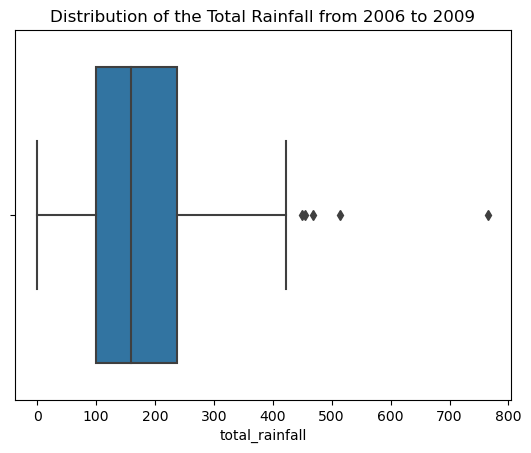

In [73]:
# checking for outliers in the total_rainfall column as the min total rainfall of 0.2 stands out 

fig = sns.boxplot(data=climate_tour_arr_df,x='total_rainfall')
fig.set(title="Distribution of the Total Rainfall from 2006 to 2009")

I am keeping these outliers as rain is seasonal in Singapore and in the monsoon periods, there can be heavy rain as compared to inter-monsoon periods.

The longest total rainfall in the dataset was 762.9 mm in December 2006 while the shortest total rainfall was 0.2 mm in February 2014.

The maximum total rainfall usually falls during the monsoon season between November to January and it seems to be decreasing from 2012, while the minimum total rainfall either falls in February or in June.

The highest maximum surface temperature was 35.5 degree celcius in Mar 2010, while the lowest maximum surface temperature was 31.8 degree celcius in December 2007 and January 2014.

The highest maximum surface temperature falls between February and May and ranges between 33 and 35.5 degrees celcius, while the lowest maximum surface temperature falls in December to January and also happen during the dry seasons in year 2012 and 2018.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


### I will be analysing the trend in the number of tourists arriving to Singapore throughout the whole dataset before narrowing it down to a specific period.

Text(0.5, 1.0, 'Correlation between features')

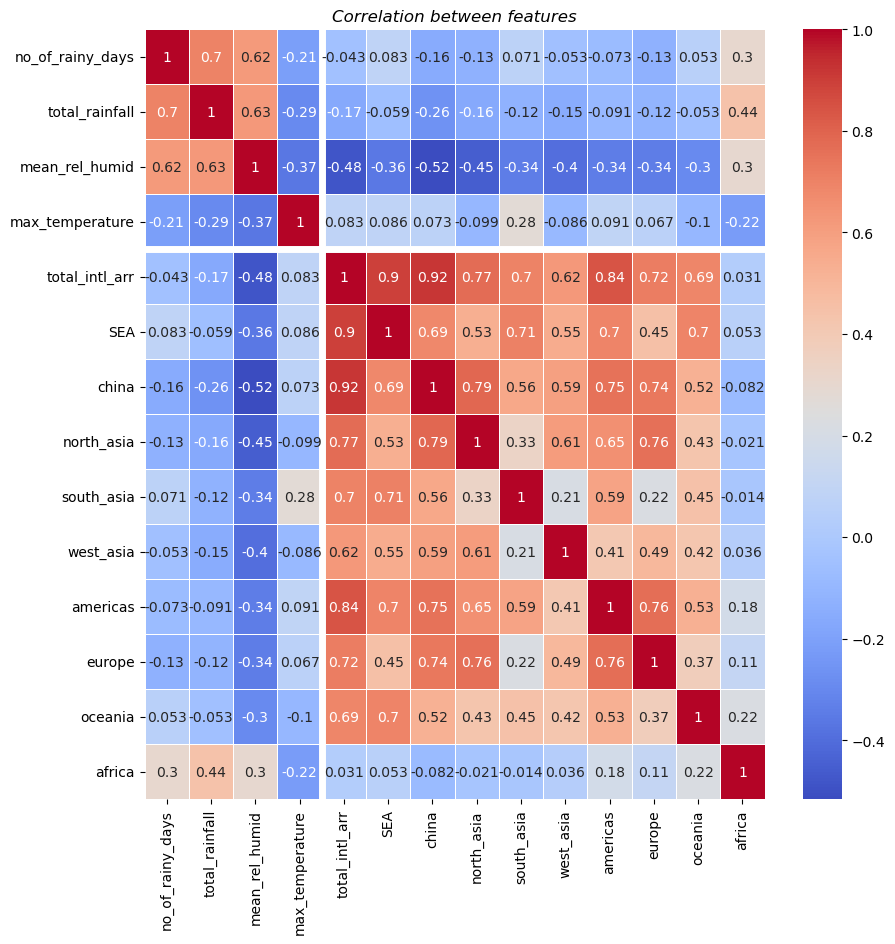

In [75]:
# Visualising the correlations between the features on a heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data=climate_tour_arr_df.iloc[:,3:].corr(numeric_only=True), annot=True, linewidths=.5, ax=ax,cmap='coolwarm')
# ax.axhline(y=5, linewidth=4, color="r")
ax.axhline(y=4, linewidth=5, color="w")

ax.axvline(x=4, linewidth=5, color="w")
# ax.axvline(x=3, linewidth=4, color="r")

# ax.axhline(y=6, linewidth=4, color="b")
# ax.axhline(y=8, linewidth=4, color="b")

plt.title('Correlation between features', fontstyle='italic')


There is a moderate correlation between the mean relative humidity and the total number of tourist arrival.
This is the same with the mean relative humidity and the number of tourists from China and North Asia.

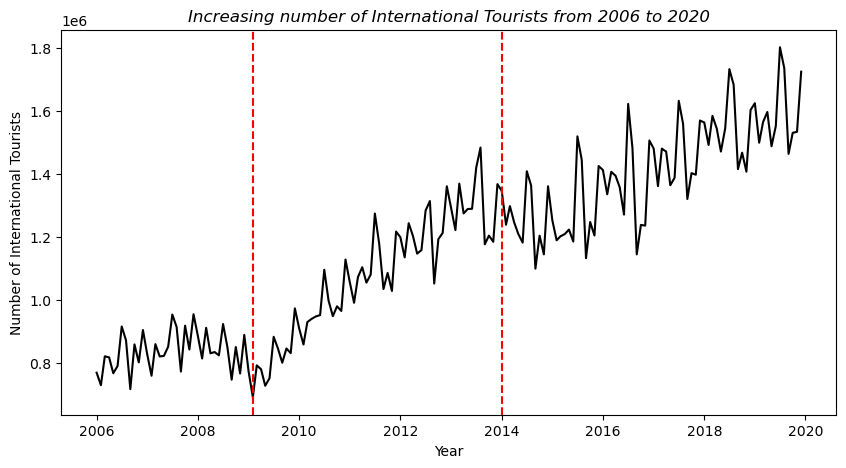

In [76]:
fig, ax = plt.subplots(figsize=(10,5)) 

plt.plot(climate_tour_arr_df.year_mm, climate_tour_arr_df.total_intl_arr, c="black")
plt.title('Increasing number of International Tourists from 2006 to 2020', fontstyle='italic')
plt.xlabel('Year')
plt.ylabel('Number of International Tourists')

spec_date1 = pd.to_datetime('2009-02-01')
ax.axvline(x=spec_date1,linestyle='--', c='r')

spec_date2 = pd.to_datetime('2014-01-01')
ax.axvline(x=spec_date2,linestyle='--', c='r')

plt.show()

From the chart, we can see that there are 3 segments to this chart, between 2006 and 2009, 2009 to 2013 and then 2014 onwards.
Due to the different trends across these three segments, we are going to focus on the latest segment, which is 2014 onwards to further analysis the relationship between the climate and the number of tourists. 

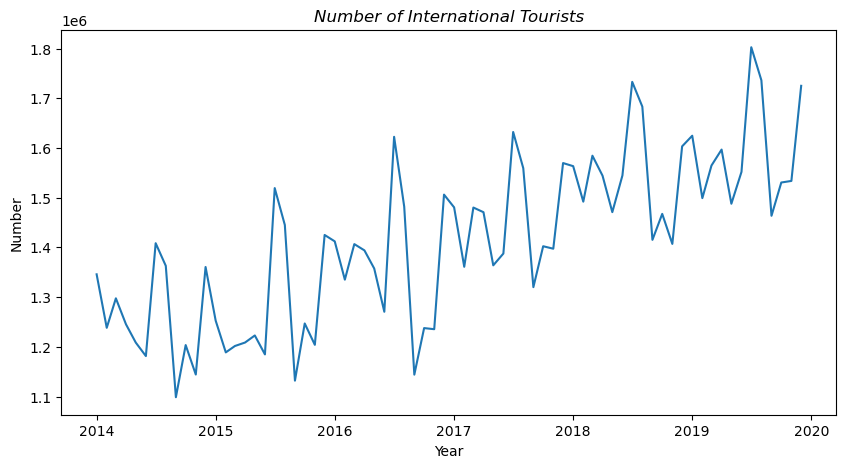

In [77]:
fig, ax = plt.subplots(figsize=(10,5)) 

# plt.plot(climate_tourArr.year_mm, climate_tourArr.total_intl_arr, c="black")
sns.lineplot(data=climate_tour_arr_df[climate_tour_arr_df['year']>2013],x='year_mm', y='total_intl_arr')

plt.title('Number of International Tourists', fontstyle='italic')
plt.xlabel('Year')
plt.ylabel('Number')

plt.show()

In general, the number of tourists arrival in Singapore increases.

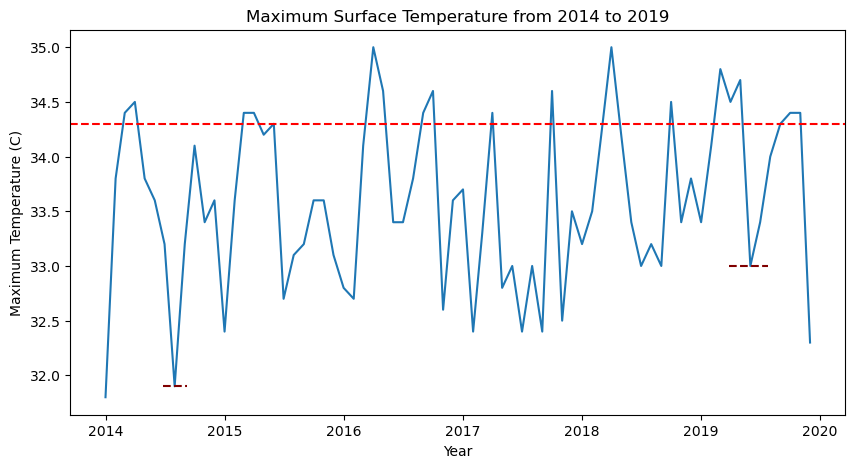

In [92]:
# Visualising the maximum surface temperature from 2014 till before covid period 

fig, ax = plt.subplots(figsize=(10,5)) 

mst=sns.lineplot(data=climate_tour_arr_df[climate_tour_arr_df['year']>2013], y='max_temperature', x='year_mm')
mst.set(title="Maximum Surface Temperature from 2014 to 2019", xlabel='Year',ylabel='Maximum Temperature (C)')

ax.axhline(y=34.3,linestyle='--', c='r')
ax.axhline(y=31.9,linestyle='--', c='maroon', xmin=0.12, xmax=0.15)
ax.axhline(y=33.0,linestyle='--', c='maroon', xmin=0.85, xmax=0.90)

We can observe that the hotter periods of maximum surface temperature lies between the 34.3 and 35.0 degree celcius.
We can also see that the lowest maximum surface temperature increases from mid 2014 to mid 2019 as shown by the maroon line.

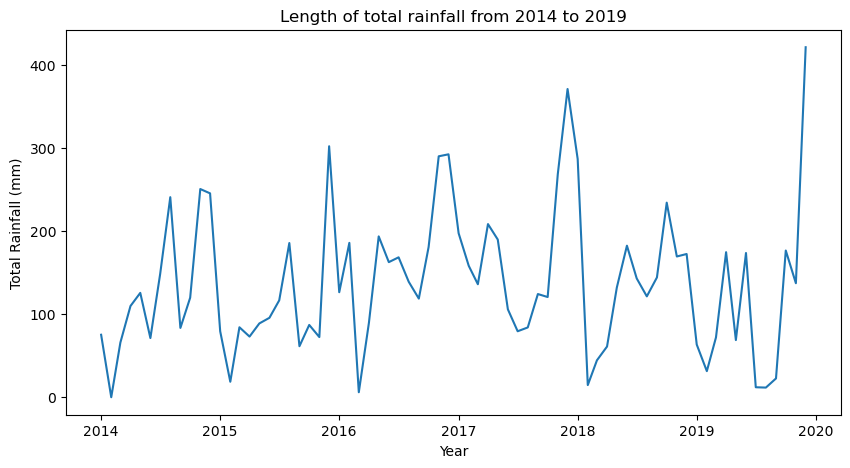

In [79]:
# Visualising the length of total rainfall from 2014 until before covid

fig, ax = plt.subplots(figsize=(10,5)) 

ax1=sns.lineplot(data=climate_tour_arr_df[climate_tour_arr_df['year']>2013], y='total_rainfall', x='year_mm')
ax1.set(title="Length of total rainfall from 2014 to 2019", xlabel='Year',ylabel='Total Rainfall (mm)')


# Show the plot
plt.show()


There is an increasing maximum total rainfall over the years and a steady minimum total rainfall.

[Text(0.5, 1.0, 'No. of rainy days from 2014 to 2019'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'No. of rainy days')]

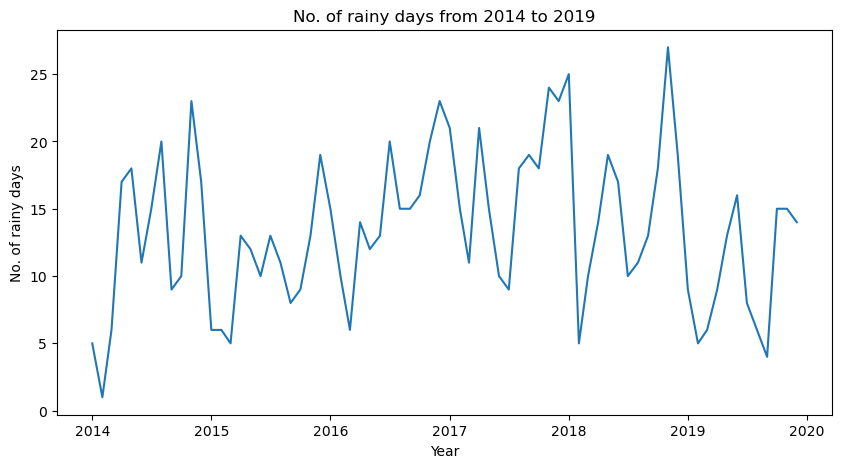

In [80]:
# Visualising the no. of days of rain from 2014 until before covid

fig, ax = plt.subplots(figsize=(10,5)) 

rd = sns.lineplot(data=climate_tour_arr_df[climate_tour_arr_df['year']>2013], y='no_of_rainy_days', x='year_mm')
rd.set(title="No. of rainy days from 2014 to 2019", xlabel='Year',ylabel='No. of rainy days')

We can see that, at the end of the years, the number of rainy days increased but at the beginning of the years, the number of rainy days decreased.
This means that the rainy days are getting longer during the monsoon seasons and shorter rainy days during the dryer periods.

[Text(0.5, 1.0, 'Mean Relative Humidity from 2014 to 2019'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Mean Relative Humidity (%)')]

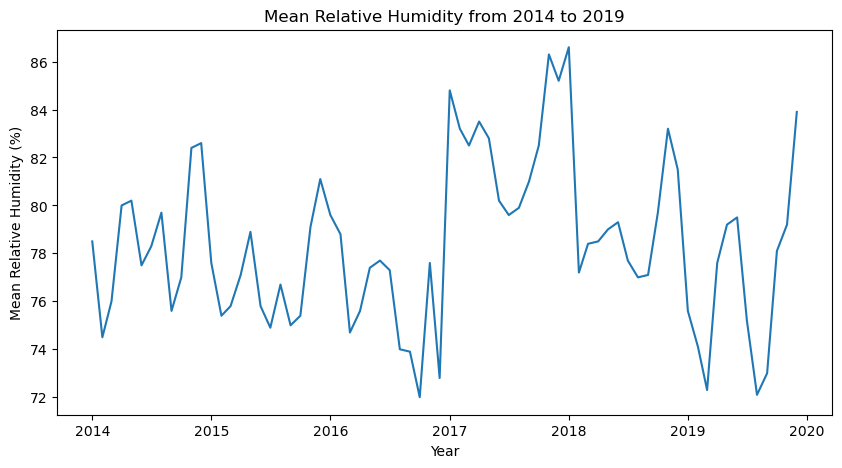

In [81]:
# Visualising the Mean Relative Humidity from 2014 until before covid

fig, ax = plt.subplots(figsize=(10,5)) 

rd = sns.lineplot(data=climate_tour_arr_df[climate_tour_arr_df['year']>2013], y='mean_rel_humid', x='year_mm')
rd.set(title="Mean Relative Humidity from 2014 to 2019", xlabel='Year',ylabel='Mean Relative Humidity (%)')

The mean relative humidity seems to have decreased from 2014 to 2017 but it has a steeper slope from 2017 to mid 2019. We can interpret that the weather conditions might have a drastic change after 2017 to observe a less volatile humidity level each year as compared to the humidity level in the previous years.

[Text(0.5, 1.0, 'The relationship between the Total International Arrival and the Mean Relative Humidity'),
 Text(0.5, 0, 'Mean Relative Humidity'),
 Text(0, 0.5, 'Total International Arrival')]

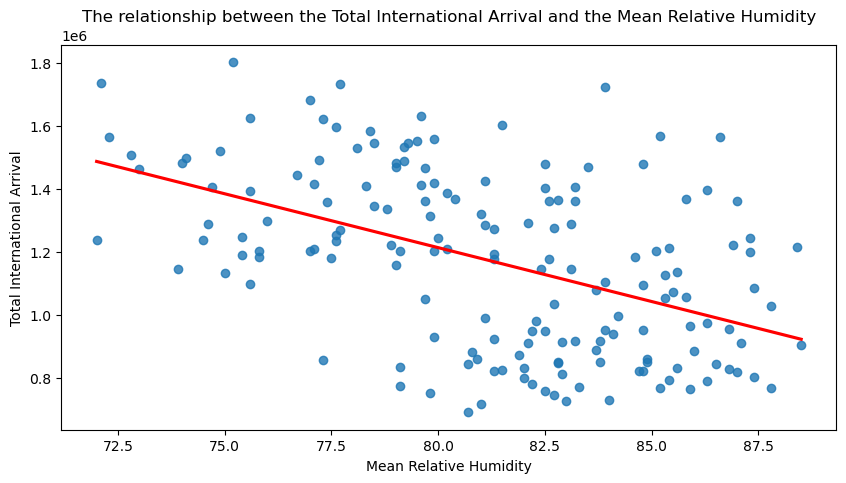

In [82]:
fig, ax = plt.subplots(figsize=(10,5)) 
tm = sns.regplot(x = "mean_rel_humid", y = "total_intl_arr", data = climate_tour_arr_df, ci=None, line_kws={"color": "red"})
tm.set(title="The relationship between the Total International Arrival and the Mean Relative Humidity", xlabel='Mean Relative Humidity',ylabel='Total International Arrival')

A moderate relationship between the mean relative humidity and the total international arrival.

There seems to be is a steeper increase in the number of tourists after 2014. Hence, we will be studying the trends after 2014.

[Text(0.5, 1.0, 'The relationship between the No. of Chinese Tourists and the Mean Relative Humidity'),
 Text(0.5, 0, 'Mean Relative Humidity'),
 Text(0, 0.5, 'No. of Chinese Tourist')]

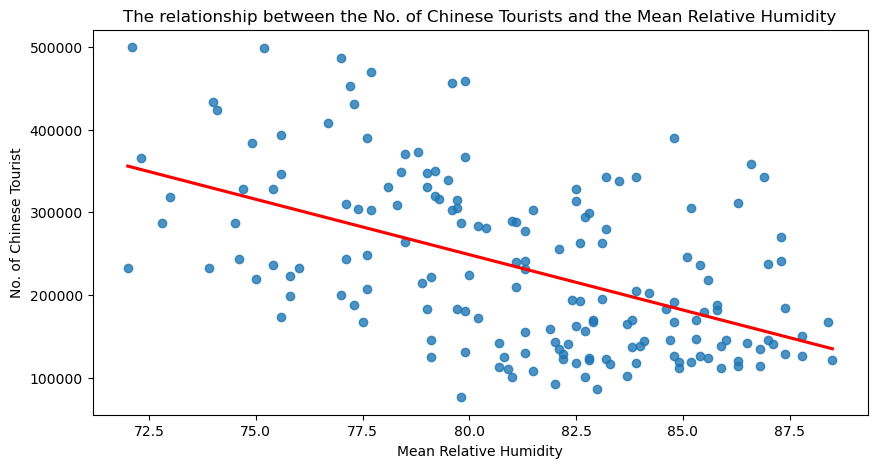

In [83]:
fig, ax = plt.subplots(figsize=(10,5)) 
tm = sns.regplot(x = "mean_rel_humid", y = "china", data = climate_tour_arr_df, ci=None, line_kws={"color": "red"})
tm.set(title="The relationship between the No. of Chinese Tourists and the Mean Relative Humidity", xlabel='Mean Relative Humidity',ylabel='No. of Chinese Tourist')

A moderate relationship between the mean relative humidity and the number of tourist arrival from China.

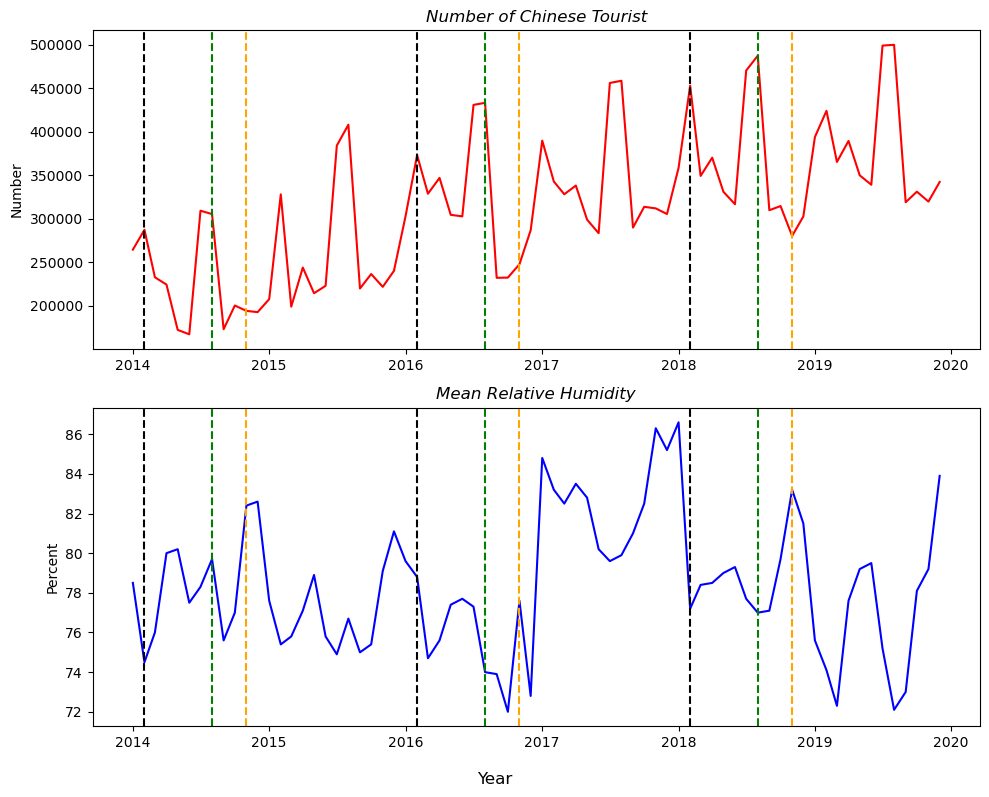

In [84]:
fig, (ax2,ax3) = plt.subplots(2, figsize=(10,8))
#rain, = ax1.plot(climate_tourArr[climate_tourArr['year']>2013].year_mm, climate_tourArr[climate_tourArr['year']>2013].total_rainfall, c="purple")
tourist, = ax2.plot(climate_tour_arr_df[climate_tour_arr_df['year']>2013].year_mm, climate_tour_arr_df[climate_tour_arr_df['year']>2013].china, c="red")
humid, = ax3.plot(climate_tour_arr_df[climate_tour_arr_df['year']>2013].year_mm, climate_tour_arr_df[climate_tour_arr_df['year']>2013].mean_rel_humid, c="blue")

fig.supxlabel('Year')

# ax1.set_title('Total Rainfall', fontstyle='italic')
# ax1.set(ylabel='Total rainfall length (mm)')
ax2.set_title('Number of Chinese Tourist', fontstyle='italic')
ax2.set(ylabel='Number')
ax3.set_title('Mean Relative Humidity', fontstyle='italic')
ax3.set(ylabel='Percent')

# during dry season
spec_date1 = pd.to_datetime('2016-02-01')
# ax1.axvline(x=spec_date1,linestyle='--', c='r')
ax2.axvline(x=spec_date1,linestyle='--', c='black')
ax3.axvline(x=spec_date1,linestyle='--', c='black')

spec_date2 = pd.to_datetime('2014-02-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date2,linestyle='--', c='black')
ax3.axvline(x=spec_date2,linestyle='--', c='black')

spec_date3 = pd.to_datetime('2018-02-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date3,linestyle='--', c='black')
ax3.axvline(x=spec_date3,linestyle='--', c='black')

# during school holiday / dry
spec_date1 = pd.to_datetime('2016-08-01')
# ax1.axvline(x=spec_date1,linestyle='--', c='r')
ax2.axvline(x=spec_date1,linestyle='--', c='g')
ax3.axvline(x=spec_date1,linestyle='--', c='g')

spec_date2 = pd.to_datetime('2014-08-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date2,linestyle='--', c='g')
ax3.axvline(x=spec_date2,linestyle='--', c='g')

spec_date3 = pd.to_datetime('2018-08-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date3,linestyle='--', c='g')
ax3.axvline(x=spec_date3,linestyle='--', c='g')


# during wet season
spec_date1 = pd.to_datetime('2016-11-01')
# ax1.axvline(x=spec_date1,linestyle='--', c='r')
ax2.axvline(x=spec_date1,linestyle='--', c='orange')
ax3.axvline(x=spec_date1,linestyle='--', c='orange')

spec_date2 = pd.to_datetime('2014-11-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date2,linestyle='--', c='orange')
ax3.axvline(x=spec_date2,linestyle='--', c='orange')

spec_date3 = pd.to_datetime('2018-11-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date3,linestyle='--', c='orange')
ax3.axvline(x=spec_date3,linestyle='--', c='orange')

fig.tight_layout()
plt.show()


The black dotted lines are in February which is a dry season, the red dotted lines are in August which is a school holiday in China and a dry season in Singapore and the blue dotted lines are
in November, which is a wet season in Singapore.

Here we can see that aside from the school holiday period, when the humidity is relatively low, the number of tourists from China is at its peak and the converse is true.

[Text(0.5, 1.0, 'The relationship between the No. of North Asian Tourists and the Mean Relative Humidity'),
 Text(0.5, 0, 'Mean Relative Humidity'),
 Text(0, 0.5, 'No. of North Tourist')]

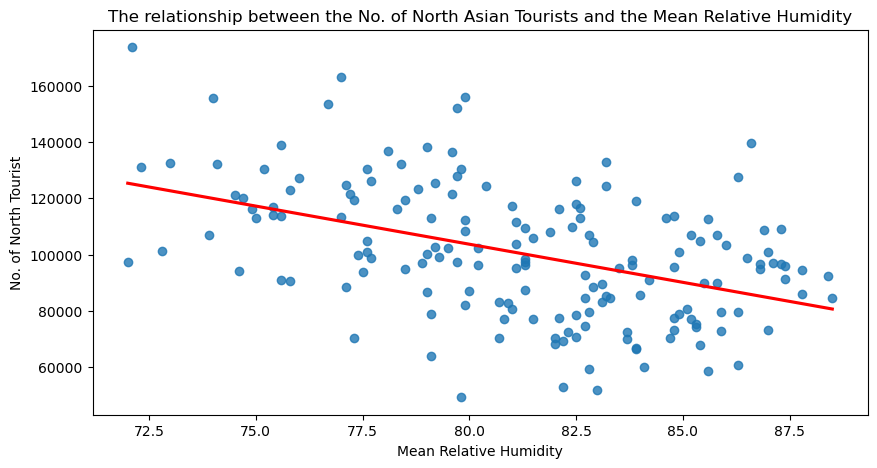

In [86]:
fig, ax = plt.subplots(figsize=(10,5)) 
tm = sns.regplot(x = "mean_rel_humid", y = "north_asia", data = climate_tour_arr_df, ci=None, line_kws={"color": "red"})
tm.set(title="The relationship between the No. of North Asian Tourists and the Mean Relative Humidity", xlabel='Mean Relative Humidity',ylabel='No. of North Tourist')

A moderate negative correlation betwen the mean relative humidity and the number of north asian tourists can be seen from the chart.

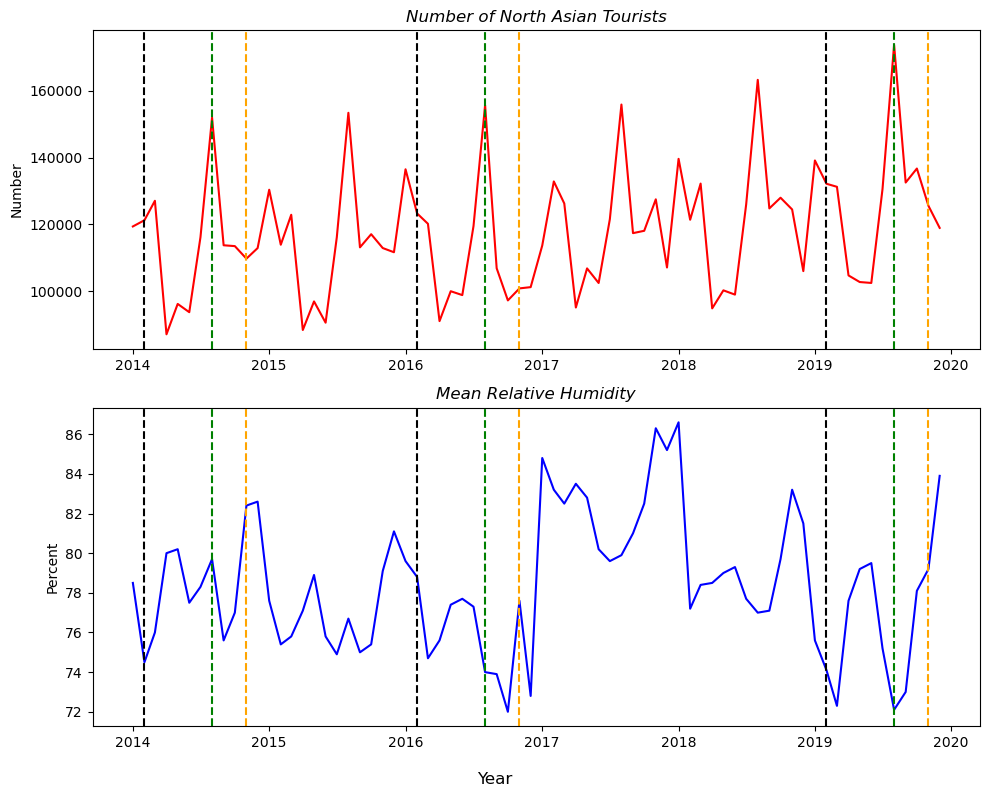

In [87]:
fig, (ax2,ax3) = plt.subplots(2, figsize=(10,8))
tourist, = ax2.plot(climate_tour_arr_df[climate_tour_arr_df['year']>2013].year_mm, climate_tour_arr_df[climate_tour_arr_df['year']>2013].north_asia, c="red")
humid, = ax3.plot(climate_tour_arr_df[climate_tour_arr_df['year']>2013].year_mm, climate_tour_arr_df[climate_tour_arr_df['year']>2013].mean_rel_humid, c="blue")

fig.supxlabel('Year')

ax2.set_title('Number of North Asian Tourists', fontstyle='italic')
ax2.set(ylabel='Number')
ax3.set_title('Mean Relative Humidity', fontstyle='italic')
ax3.set(ylabel='Percent')

# during dry season
spec_date1 = pd.to_datetime('2016-02-01')
# ax1.axvline(x=spec_date1,linestyle='--', c='r')
ax2.axvline(x=spec_date1,linestyle='--', c='black')
ax3.axvline(x=spec_date1,linestyle='--', c='black')

spec_date2 = pd.to_datetime('2019-02-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date2,linestyle='--', c='black')
ax3.axvline(x=spec_date2,linestyle='--', c='black')

spec_date3 = pd.to_datetime('2014-02-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date3,linestyle='--', c='black')
ax3.axvline(x=spec_date3,linestyle='--', c='black')



# during school holiday / dry season singapore
spec_date1 = pd.to_datetime('2016-08-01')
# ax1.axvline(x=spec_date1,linestyle='--', c='r')
ax2.axvline(x=spec_date1,linestyle='--', c='g')
ax3.axvline(x=spec_date1,linestyle='--', c='g')

spec_date2 = pd.to_datetime('2019-08-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date2,linestyle='--', c='g')
ax3.axvline(x=spec_date2,linestyle='--', c='g')

spec_date3 = pd.to_datetime('2014-08-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date3,linestyle='--', c='g')
ax3.axvline(x=spec_date3,linestyle='--', c='g')


# during wet season
spec_date1 = pd.to_datetime('2016-11-01')
# ax1.axvline(x=spec_date1,linestyle='--', c='r')
ax2.axvline(x=spec_date1,linestyle='--', c='orange')
ax3.axvline(x=spec_date1,linestyle='--', c='orange')

spec_date2 = pd.to_datetime('2019-11-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date2,linestyle='--', c='orange')
ax3.axvline(x=spec_date2,linestyle='--', c='orange')

spec_date3 = pd.to_datetime('2014-11-01')
# ax1.axvline(x=spec_date2,linestyle='--', c='r')
ax2.axvline(x=spec_date3,linestyle='--', c='orange')
ax3.axvline(x=spec_date3,linestyle='--', c='orange')


fig.tight_layout()
plt.show()


A similar observations to the chinese tourists can be seen for north asian tourists.<br>
During the dry seasons (black dotted lines), there were more tourists arrival and during the wet seaons (blue dotted lines), there were fewer north asian tourists coming to Singapore.

[Text(0.5, 1.0, 'The relationship between the No. of rainy days and the Mean Relative Humidity'),
 Text(0.5, 0, 'Mean Relative Humidity'),
 Text(0, 0.5, 'No. of North Tourist')]

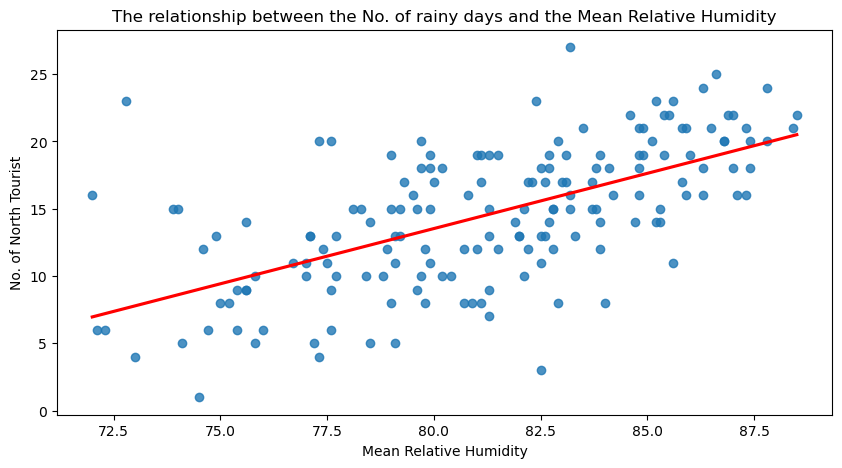

In [88]:
# I want to check the how the mean relative humidity responds with the number of rainy days

fig, ax = plt.subplots(figsize=(10,5)) 
tm = sns.regplot(x = "mean_rel_humid", y = "no_of_rainy_days", data = climate_tour_arr_df, ci=None, line_kws={"color": "red"})
tm.set(title="The relationship between the No. of rainy days and the Mean Relative Humidity", xlabel='Mean Relative Humidity',ylabel='No. of North Tourist')

[Text(0, 0.5, 'Percent')]

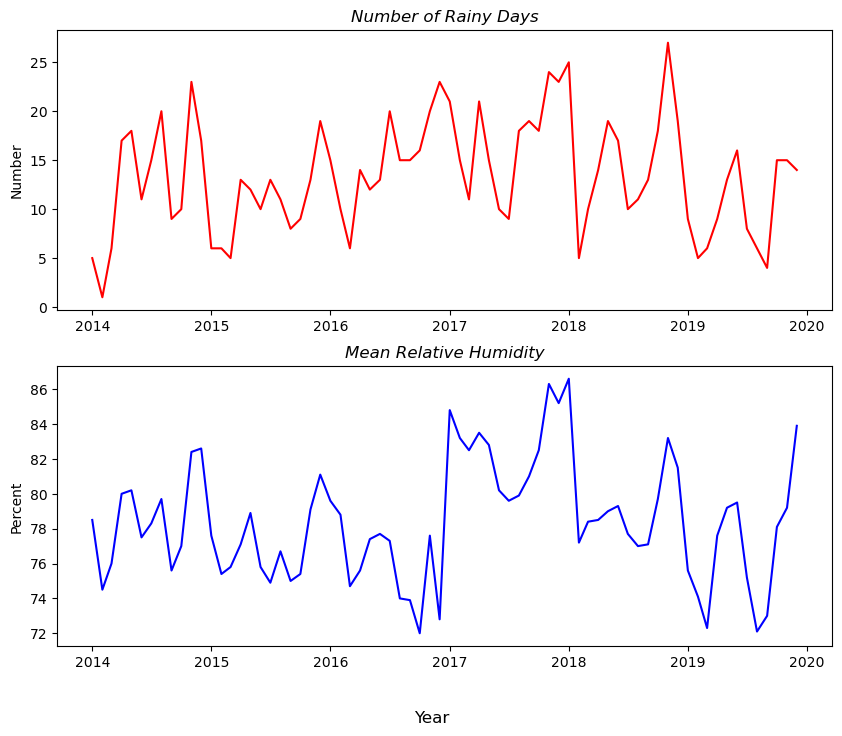

In [89]:
fig, (ax2,ax3) = plt.subplots(2, figsize=(10,8))
rain, = ax2.plot(climate_tour_arr_df[climate_tour_arr_df['year']>2013].year_mm, climate_tour_arr_df[climate_tour_arr_df['year']>2013].no_of_rainy_days, c="red")
humid, = ax3.plot(climate_tour_arr_df[climate_tour_arr_df['year']>2013].year_mm, climate_tour_arr_df[climate_tour_arr_df['year']>2013].mean_rel_humid, c="blue")

fig.supxlabel('Year')

ax2.set_title('Number of Rainy Days', fontstyle='italic')
ax2.set(ylabel='Number')
ax3.set_title('Mean Relative Humidity', fontstyle='italic')
ax3.set(ylabel='Percent')

The mean relative humidity and the number of rainy days are in tandem.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

In conclusion, the number of inbound tourists to Singapore remains generally unaffected by the changes in the Singaporean climate.

However, from the analysis, tourists prefer the dryer seasons with low humidity level which is from June to August.

During the dry seasons, the Singapore Tourism Board (STB) can collaborate and organise outdoor activities and programmes as well as offers to tourist attractions such as the Singapore Zoo, the Universal Studios Singapore or the Gardens by The Bay as well as programmes along neighborhoods like The Civic District, to attract significantly more tourists. 

During the wet seasons, the STB can have tourists to visit the indoor gardens at Gardens By The Bay and having collaborative efforts with museums for indoor exhibitions as well as indoor adventures through virtual reality games to attract a wide age range of tourists.